# Simulation of SEIARV model



In [ ]:
import pandas as pd

from wbepi import models as md
import numpy as np
import matplotlib.pyplot as plt

# for details of SEIARV model, see wbepi.models
ctrl_C = lambda t: 0.5
ctrl_D = lambda t: 0.8
wbe_model = md.SEIARV(ctrl_C, ctrl_D)
A = wbe_model.ode_sol()
plt.plot(A["tspan"], A["solution"][:, 2])
plt.show()

# Sensitivity Analysis

Initial Value: [100, 1, 0]
Tspan: [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
Parameters: (0, 0, 0.4888748118604834, 0.45262798717022434)
Initial Value: [100, 1, 0]
Tspan: [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
Parameters: (0, 0, 0.3738540885151046, 0.3212592355642483)
Initial Value: [100, 1, 0]
Tspan: [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
Parameters: (0, 0, 0.5847056685746794, 0.34477802889517883)
Initial Value: [100, 1, 0]
Tspan: [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
Parameters: (0, 0, 0.5470719549893658, 0.11754823981029115)
Initial Value: [100, 1, 0]
Tspan: [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
Parameters: (0, 0, 0.450766503531948, 0.388860119598087)
Initial Value: [100, 1, 0]
Tspan: [0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
Parameters: (0, 0, 0.17672360666785125, 0.19958545379524645)
Initial Value: [100, 1, 0]
Tspan: [0.000e+0

F:\Anaconda\envs\ML\lib\site-packages\SALib\analyze\rbd_fast.py:106: RuntimeWarning: invalid value encountered in double_scalars
  return D1 / V


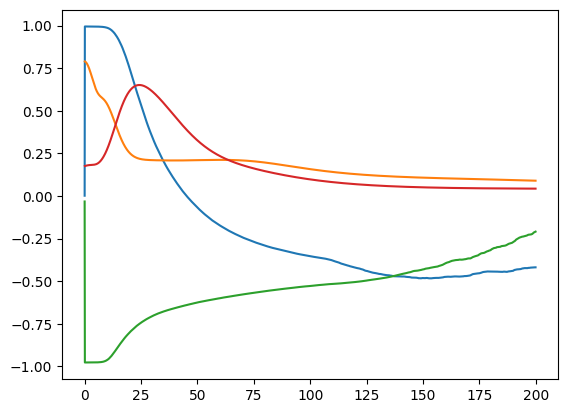

In [2]:
from wbepi import sensitivity as st
from wbepi import basic_models as md
import numpy as np
import matplotlib.pyplot as plt

# SIRmode as a test

prob = {"num_vars": 2,
"names": ["beta", "gamma"],
# ‘groups’:[‘g1′,’g1′,’g2′,’g2′,’g3’],
"bounds":[[0.1, 0.9], [0.1, 0.5]],
"dists":["unif", "unif"]
}
Nsum=1000
X = st.LHS(prob, Nsum)


tspan1 = np.arange(0,200,0.1)
Y=np.zeros((len(tspan1),Nsum))
for i in np.arange(Nsum):
    wbe_model = md.SIR(beta=X[i,0],gamma=X[i,1])
    A=wbe_model.ode_sol()
    #print(A["solution"])
    Y[:,i]= A["solution"][:, 1]


Sen_results1=np.zeros((len(tspan1),2))
Sen_results2=np.zeros((len(tspan1),2))
for j in np.arange(len(tspan1)):
    K=Y[j,:]
    Sen_results1[j,:]=st.PRCC(X,K)
    Sen_results2[j,:] = st.RBD_FAST(prob, X, K)
    #Si1  = morris.analyze(prob, X, K, conf_level=0.95, print_to_console=False, num_levels=4)
    #Sen_results2[j,:]=Si["S1"]
plt.figure(1)
plt.plot(A["tspan"], Sen_results1[:,0],label="beta_method_one")
plt.plot(A["tspan"], Sen_results2[:,0],label="beta_method_two")
plt.plot(A["tspan"], Sen_results1[:,1],label="gamma_method_one")
plt.plot(A["tspan"], Sen_results2[:,1],label="gamma_method_two")
plt.show()
